In [15]:
import pandas as pd

# fetch data
df = pd.read_csv('./data/Case_Studies/CaseStudy01_Divorce_YoungAdults_Data.csv');
#df.head()

In [16]:
def binarize_year(year):
    return year - 89;

df['DIVYEAR'] = [binarize_year(year) for year in df['DIVYEAR']];
df.head()

,DIVYEAR,momint,dadint,momclose,depression,livewithmom,gethitched
0,1,3,2,2,3,1,3
1,1,3,2,3,2,2,2
2,0,1,3,1,4,1,2
3,1,3,4,3,3,1,3
4,0,1,3,2,1,1,2


In [17]:
for row in df['livewithmom'].items():
    #print(row[0], row[1])
    if(row[1] == 9): # did not tell
        df['livewithmom'][row[0]] = 1 if df['momint'][row[0]] > df['dadint'][row[0]] else 2;
df.head()

,DIVYEAR,momint,dadint,momclose,depression,livewithmom,gethitched
0,1,3,2,2,3,1,3
1,1,3,2,3,2,2,2
2,0,1,3,1,4,1,2
3,1,3,4,3,3,1,3
4,0,1,3,2,1,1,2


In [18]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# normalize the data
def normalize(x):
    x = np.array(x);
    return ((x - min(x)) / (max(x)-min(x)));

X = df;
X = np.apply_along_axis(normalize, 0, X)
X.shape

(47, 7)

In [19]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4, random_state=0);
model.fit(X);
cluster_pred = model.predict(X);

X_centers = model.cluster_centers_;
#X_centers.shape

X_with_centers = np.append(X, X_centers, axis=0);
#X_with_centers.shape

#cluster_pred = np.append(cluster_pred, model.predict(X_centers));
cluster_pred = np.append(cluster_pred, np.full((1, 4), -1));
#model.predict(X_centers)
cluster_pred.shape

(51,)

In [20]:
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS

# cluster the data

manifold_model = MDS();
clustering2D = manifold_model.fit_transform(X_with_centers);

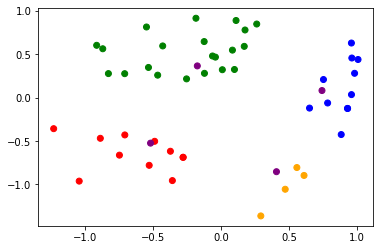

In [21]:
import matplotlib.pyplot as plt

# visualize clusters

plot_colors = {
    -1: 'purple',
    0: 'red',
    1: 'green',
    2: 'blue',
    3: 'orange'
}

def getColor(point):
    return plot_colors[point];

plt.scatter(clustering2D[:,0], clustering2D[:,1], c = [getColor(point) for point in cluster_pred]);
plt.show();